In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF

from nltk import word_tokenize
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer

from matplotlib import pyplot
import numpy
import seaborn

%matplotlib inline

In [2]:
_groups = fetch_20newsgroups()

In [3]:
type(_groups)

sklearn.datasets.base.Bunch

In [4]:
_groups.keys()

dict_keys(['target', 'DESCR', 'filenames', 'description', 'data', 'target_names'])

In [5]:
_groups['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
# The target key corresponds to a newsgroup but is encoded as an integer.
# They range from 0 to 19, representing 20 topics.
numpy.unique(_groups['target'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [7]:
# first document, it's topic number, and name
type(_groups.data)

list

In [8]:
_groups.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [9]:
print(_groups.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [10]:
_groups['target'][0]

7

In [11]:
_groups['target_names'][_groups['target'][0]]

'rec.autos'

In [12]:
len(_groups.data[0])

721

In [13]:
len(_groups.data[1])

858

In [14]:
# - bag of words model: View a text as a bag of words

# - In the context of multiple topics or categories, it is important to know what the distribution of topics is. 
# A uniform class distribution is the easiest to deal with because there are no under-represented or 
# over-represented categories. 
# However, we frequently have a skewed distribution with one or more categories dominating.

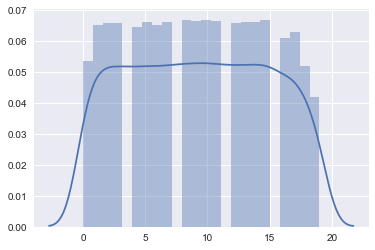

In [15]:
seaborn.distplot(_groups.target)

# distribution seems to be uniform

In [16]:
# - Histogram of the 500 highest word counts

# - We have two basic strategies to deal words from the same root:
# 1. Stemming - It involves chopping, if necessary, off letters, for example, 'words' becomes 'word' after stemming. 
#    The result of stemming doesn't have to be a valid word. 
# 2. Lemmatizing - It is slower but more accurate. It performs a dictionary lookup and guarantees to return a valid 
#    word unless we start with a non-valid word.

In [17]:
# return only alphabet words, filter out non-alphabet words
def letters_only(astr):
    return astr.isalpha()

In [18]:
_cv = CountVectorizer(stop_words='english', max_features=500)

In [19]:
_all_names = set(names.words())

In [20]:
_lemmatizer = WordNetLemmatizer()

In [21]:
_cleaned = []
for _post in _groups.data:
    for _word in word_tokenize(_post):
        if letters_only(_word) and _word not in _all_names:
            _cleaned.append(_lemmatizer.lemmatize(_word.lower()))

In [22]:
print(_cleaned[0:50])

['from', 'lerxst', 'where', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'organization', 'university', 'of', 'maryland', 'college', 'line', 'i', 'wa', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'i', 'saw', 'the', 'other', 'day', 'it', 'wa', 'a', 'sport', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'wa', 'called', 'a']


In [23]:
_transformed = _cv.fit_transform(_cleaned)
type(_transformed)

scipy.sparse.csr.csr_matrix

In [24]:
print(_cv.get_feature_names())

['able', 'access', 'act', 'action', 'actually', 'add', 'address', 'advance', 'ago', 'agree', 'air', 'algorithm', 'american', 'answer', 'anybody', 'apple', 'application', 'apr', 'arab', 'area', 'argument', 'arm', 'armenian', 'article', 'ask', 'asked', 'atheist', 'attack', 'authority', 'available', 'away', 'bad', 'bank', 'based', 'belief', 'believe', 'best', 'better', 'bible', 'big', 'bike', 'bit', 'black', 'board', 'body', 'book', 'box', 'building', 'bus', 'business', 'buy', 'ca', 'california', 'called', 'came', 'car', 'card', 'care', 'case', 'cause', 'center', 'certain', 'certainly', 'chance', 'change', 'check', 'child', 'chip', 'christian', 'church', 'city', 'claim', 'clear', 'clipper', 'code', 'college', 'color', 'come', 'comment', 'common', 'communication', 'company', 'computer', 'condition', 'consider', 'considered', 'contact', 'control', 'controller', 'copy', 'corporation', 'correct', 'cost', 'country', 'couple', 'course', 'court', 'crime', 'current', 'data', 'date', 'day', 'db', 

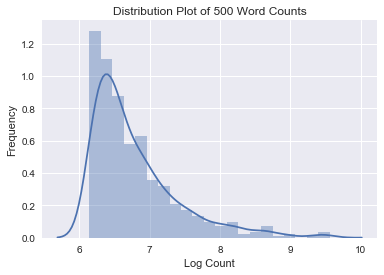

In [25]:
pyplot.xlabel('Log Count')
pyplot.ylabel('Frequency')
pyplot.title('Distribution Plot of 500 Word Counts')
seaborn.distplot(numpy.log(_transformed.toarray().sum(axis=0)))

In [26]:
# - Clustering

# The algorithm for k-means iterates between two steps, not including the (usually random) 
# initialization of k-centroids:
# (1) Assign each data point a cluster with the lowest distance.
# (2) Recalculate the center of the cluster as the mean of the cluster points coordinates.
# The algorithm stops when the cluster assignments become stable.

# K-means evaluates the  clusters through the Within Set Sum of Squared Error (WSSSE) method, 
# also known as Within Cluster Sum of Squares (WCSS). 
# This metric calculates the sum of the squared error of the distance between each point and 
# the centroid of its assigned cluster.

In [27]:
_km = KMeans(n_clusters=20)

In [28]:
_km.fit(_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
_labels = _groups.target
print(numpy.unique(_labels))
print(numpy.unique(_km.labels_))
print(len(_labels))
print(len(_km.labels_))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
11314
2886292


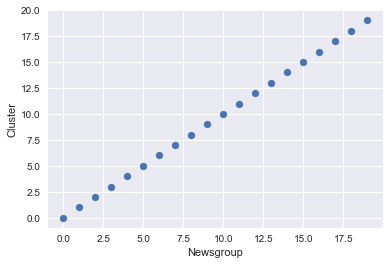

In [30]:
pyplot.scatter(numpy.unique(_labels), numpy.unique(_km.labels_))
pyplot.xlabel('Newsgroup')
pyplot.ylabel('Cluster')
pyplot.show()

In [31]:
_nmf = NMF(n_components=100, random_state=43).fit(_transformed)

In [32]:
for topic_idx, topic in enumerate(nmf.components_):
    label = '{}: '.format(topic_idx)
    print(label, " ".join([_cv.get_feature_names()[i] for i in topic.argsort()[:-9:-1]]))

NameError: name 'nmf' is not defined